In [8]:
import pickle
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'DejaVu Sans',
        'size'   : 14}

plt.rc('font', **font)

In [2]:
def get_filenames(directory):
    filenames = []
    for path, _, files in os.walk(directory):
        for name in files:
            if name.endswith('.pkl'):
                filename = os.path.join(path, name)
                matches = re.findall('data_(.+).pkl', filename)
                assert(len(matches) == 1)
                filenames.append((int(matches[0]), filename))
    filenames.sort()
    return filenames

In [3]:
def load_data(model_name, complexity='0.00', episodes=100, experiment_name=''):
    timesteps = []
    rewards = []
    lengths = []
    directory = f'/home/oskar/kth/kex/simple-env/inference/{experiment_name}/complexity_{complexity}/{model_name}'
    for timestep, filename in get_filenames(directory):
        #if timestep > 4000000: continue
        with open(filename, 'rb') as file:
            model_rewards, model_lengths = pickle.load(file)
        #timesteps.append(str(timestep//1000000) if timestep % 1000000 == 0 else '')
        timesteps.append('{:,}'.format(timestep) if timestep % 100000 == 0 else '')
        rewards.append([int(round(rew/10+1)) for rew in model_rewards])
        lengths.append(model_lengths)
    return timesteps, rewards, lengths

In [10]:
# Boxplot
def plot(x, y, name, outliers=False, figsize=(20, 5), ylim=None, xlabel='Timesteps', ylabel=None):
    plt.figure(figsize=figsize)
    plt.title(name)
    plt.boxplot(y, positions=range(len(y)), showfliers=outliers)
    plt.xticks(list(range(len(y))), x)
    if ylim is not None: plt.ylim(ylim)
    plt.xlabel(xlabel)
    if ylabel is not None: plt.ylabel(ylabel)
    print(name)
    plt.savefig(f'plots/{random.randint(1000,9999)}.svg')
    plt.show()
    plt.close()

In [5]:
# Average plot
def plot(x, y, name, outliers=False, figsize=(20, 5), ylim=None, xlabel='Timesteps', ylabel=None):
    plt.figure(figsize=figsize)
    plt.title(name)
    plt.plot([np.average(y_) for y_ in y])
    plt.plot([np.median(y_) for y_ in y])
    plt.plot([np.max(y_) for y_ in y])
    plt.plot([np.min(y_) for y_ in y])
    plt.legend(['Average', 'Median', 'Max', 'Min'])
    plt.xticks(list(range(len(y))), x)
    if ylim is not None: plt.ylim(ylim)
    plt.xlabel(xlabel)
    if ylabel is not None: plt.ylabel(ylabel)
    plt.show()
    plt.close()

Model: Empty
Complexity: 0.00


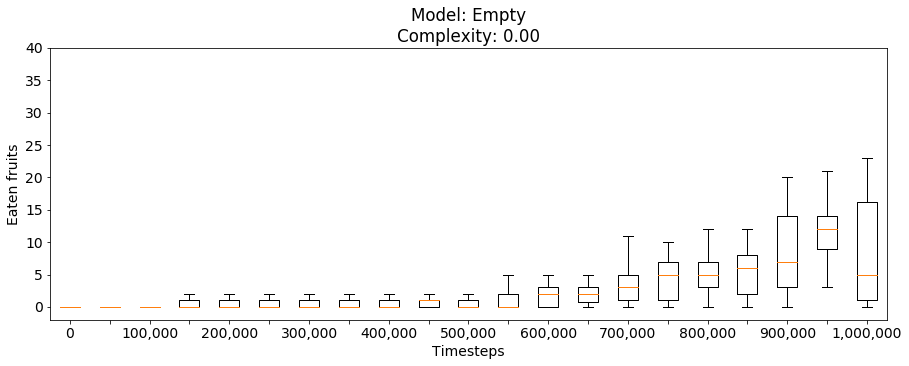

Model: Increase → Empty
Complexity: 0.00


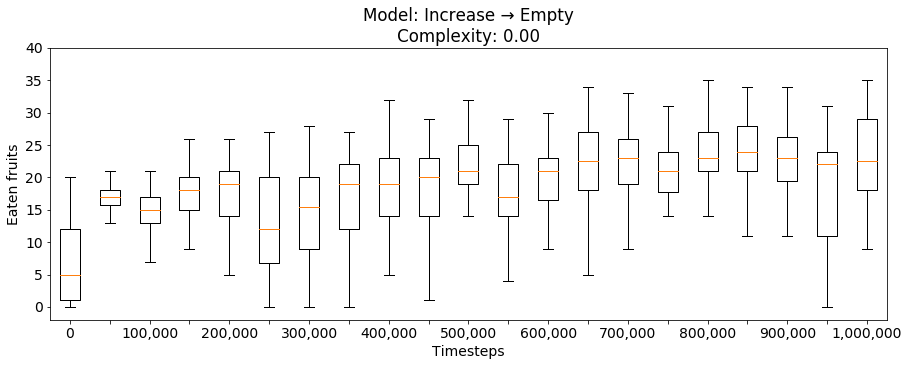

Model: Complex → Empty
Complexity: 0.00


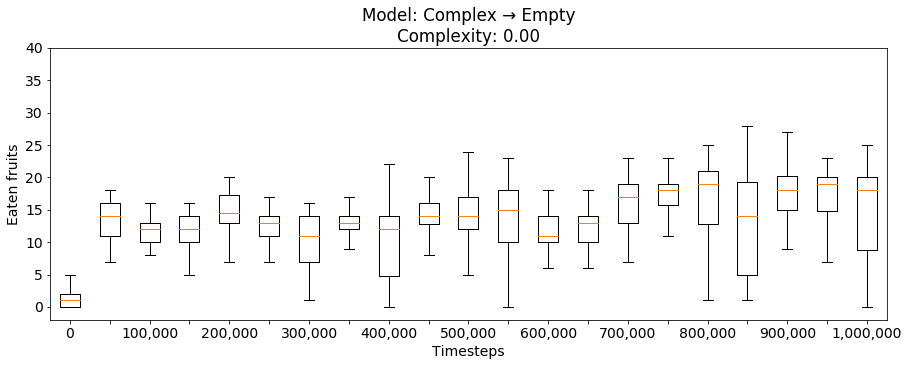

Model: Complex
Complexity: 0.09


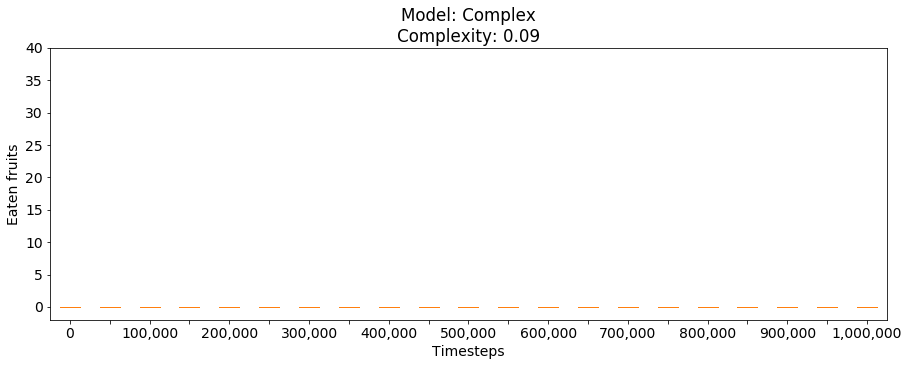

Model: Empty → Complex
Complexity: 0.09


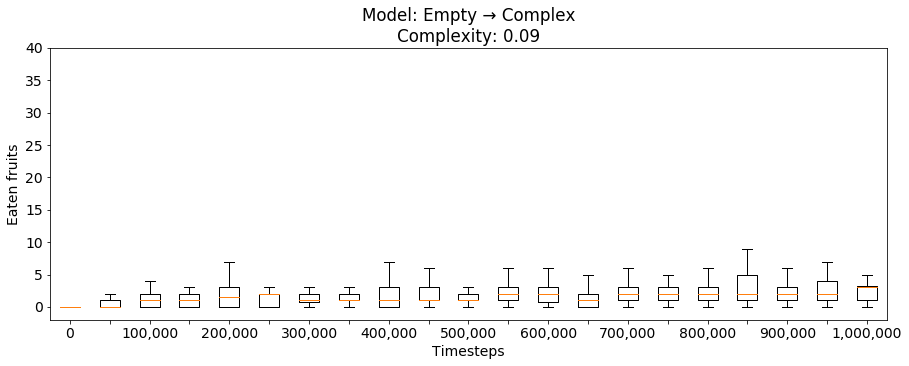

In [11]:
model_name = 'empty'
fancy_name = 'Empty'
complexity = '0.00'
timesteps, rewards, lengths = load_data(model_name, complexity=complexity, episodes=100, experiment_name='transfer')
plot(timesteps, rewards, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=((-2, 40)), figsize=(15, 5), ylabel='Eaten fruits')

model_name = 'increase_to_empty'
fancy_name = 'Increase → Empty'
complexity = '0.00'
timesteps, rewards, lengths = load_data(model_name, complexity=complexity, episodes=100, experiment_name='transfer')
plot(timesteps, rewards, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=((-2, 40)), figsize=(15, 5), ylabel='Eaten fruits')

model_name = 'noincrease_to_empty'
fancy_name = 'Complex → Empty'
complexity = '0.00'
timesteps, rewards, lengths = load_data(model_name, complexity=complexity, episodes=100, experiment_name='transfer')
plot(timesteps, rewards, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=((-2, 40)), figsize=(15, 5), ylabel='Eaten fruits')


model_name = 'noincrease'
fancy_name = 'Complex'
complexity = '0.09'
timesteps, rewards, lengths = load_data(model_name, complexity=complexity, episodes=100, experiment_name='transfer')
plot(timesteps, rewards, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=((-2, 40)), figsize=(15, 5), ylabel='Eaten fruits')

model_name = 'empty_to_complex'
fancy_name = 'Empty → Complex'
complexity = '0.09'
timesteps, rewards, lengths = load_data(model_name, complexity=complexity, episodes=100, experiment_name='transfer')
plot(timesteps, rewards, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=(-2, 40), figsize=(15, 5), ylabel='Eaten fruits')

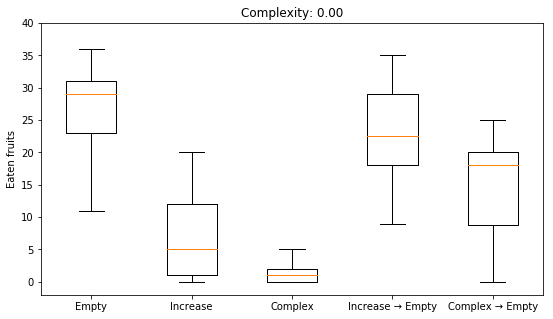

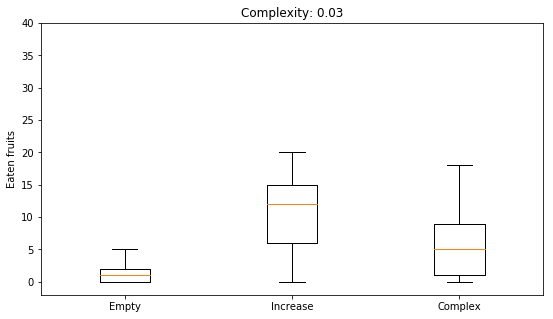

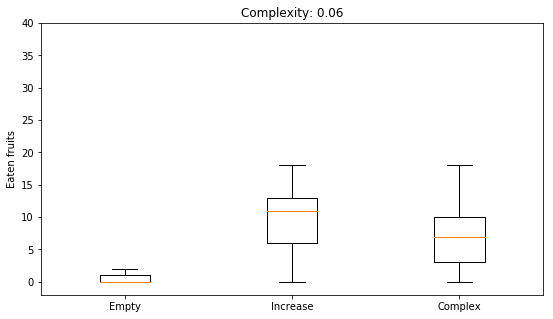

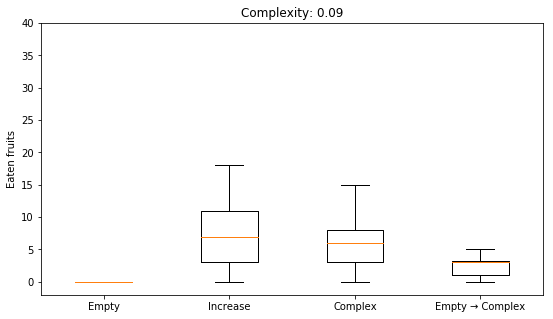

In [48]:
models = ['empty', 'increase', 'noincrease', 'empty_to_complex', 'increase_to_empty', 'noincrease_to_empty']
fancy_names = ['Empty', 'Increase', 'Complex', 'Empty → Complex', 'Increase → Empty', 'Complex → Empty']
for complexity in ['0.00', '0.03', '0.06', '0.09']:
    rewards = []
    lengths = []
    ticks = []
    # Load data
    for model_name, fancy_name in zip(models, fancy_names):
        filename = f'/home/oskar/kth/kex/simple-env/inference/inference_on_10M_100maps_10ep/complexity_{complexity}/{model_name}/data_10000000.pkl'
        try:
            with open(filename, 'rb') as file:
                model_rewards, model_lengths = pickle.load(file)
                rewards.append([int(round(rew/10+1)) for rew in model_rewards])
                lengths.append(model_lengths)
                ticks.append(fancy_name)
        except: pass
    # Plot
    plt.figure(figsize=(9, 5))
    plt.title(f'Complexity: {complexity}')
    plt.boxplot(rewards, showfliers=False)
    plt.xticks(range(1, len(rewards)+1), ticks)
    plt.ylim(bottom=-2, top=40)
    plt.ylabel('Eaten fruits')
    plt.savefig(f'plots/comparison_{str(complexity)[2:]}.svg')
    plt.show()
    plt.close()

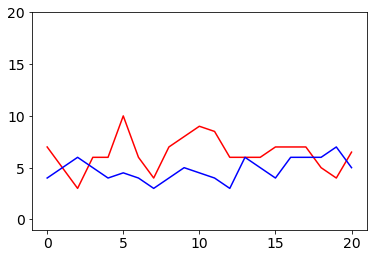

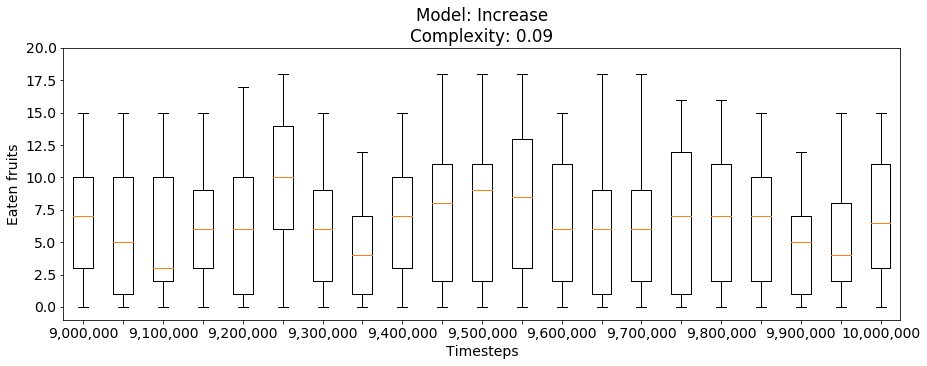

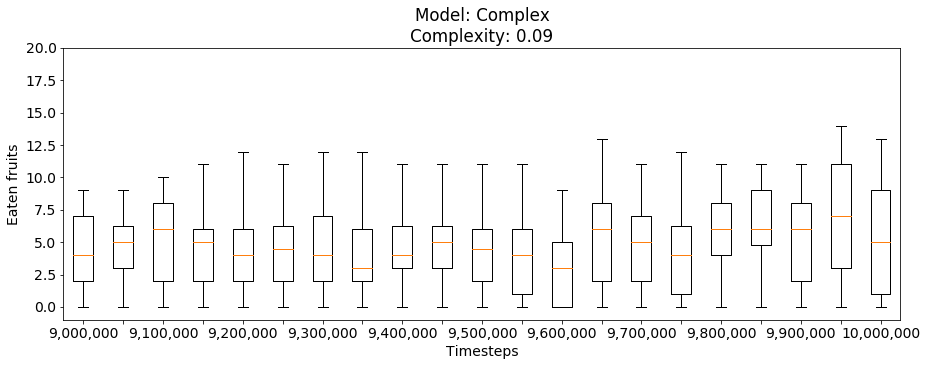

In [28]:
plt.figure()
plt.plot([np.median(rew) for rew in rewards_increase], color='red')
plt.plot([np.median(rew) for rew in rewards_noincrease], color='blue')
#plt.plot([np.mean(rew) for rew in rewards_increase])
#plt.plot([np.mean(rew) for rew in rewards_noincrease])
plt.ylim(-1, 20)
plt.show()
plt.close()

model_name = 'increase'
fancy_name = 'Increase'
complexity = '0.09'
timesteps_increase, rewards_increase, lengths_increase = load_data(model_name, complexity=complexity, episodes=100, experiment_name='')
plot(timesteps_increase, rewards_increase, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=(-1, 20), figsize=(15, 5), ylabel='Eaten fruits')

model_name = 'noincrease'
fancy_name = 'Complex'
complexity = '0.09'
timesteps_noincrease, rewards_noincrease, lengths_noincrease = load_data(model_name, complexity=complexity, episodes=100, experiment_name='')
plot(timesteps_noincrease, rewards_noincrease, f'Model: {fancy_name}\nComplexity: {complexity}',
     ylim=(-1, 20), figsize=(15, 5), ylabel='Eaten fruits')